In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('E:/secondary_data.csv', delimiter=';')

In [3]:
train.head() #Вывод первых 5 строк

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


Этот набор данных включает 61069 гипотетических грибов со шляпками на основе 173 видов (353 гриба
за вид). Каждый гриб определяется как определенно съедобный, определенно ядовитый или
неизвестен в пищевом отношении и не рекомендуется (последний класс был объединен с ядовитым классом).
Описание полей:

1.Класс: edible(съедобный)=e, 
poisonous(ядовитый)=p - также содержит грибы неизвестной съедобности.
Двадцать оставшихся переменных (n,N: номинальные ( значения, которые представляют категории без естественного упорядочения), м: метрические (количественное значение, которое можно измерить.))
2.Диаметр колпачка (м): число поплавков в см
3. Форма шапки (n): колокольчик = b, конический = c, выпуклый = x, плоский = f,
затонувшие=s, сферические=p, прочие=o
4. Поверхность крышки (N): волокнистая=i, бороздчатая=g, чешуйчатая=y, гладкая=s,
блестящий=h, кожистый=l, шелковистый=k, липкий=t,
морщинистый=w, мясистый=e
5. Цвет шапки (N): коричневый=n, охристый=b, серый=g, зеленый=r, розовый=p,
фиолетовый = u, красный = e, белый = w, желтый = y, синий = l,
оранжевый=o, черный=k
6. Кровоточите ли ушибы (n): синяки=t или кровотечение=f
7. Жаберная насадка (N): приросший=a, прикрепленный=x, понижающийся ток=d, свободный=e,
извилистый=s, pores=p, никто=f, неизвестный=?
8. Расстояние между жабрами (n): закрывать=c, надменный=d, никто=f
9. цвет жабр (n): цвет колпачка + никто=f
10. Высота форштевня (м): число поплавков в см
11. Ширина форштевня (м): число поплавков в мм
12. Корневой корень (N): луковичный=b, вздутый=s, булава=c, чашка=u, равно=e,
ризоморфы=z, укорененные=r
13. Поверхность стебля (n): см. поверхность крышки + нет = f
14. Цвет стебля (n): см. цвет шапки + нет=f
15. Тип вуали (N): частичный=p, универсальный=u
16. Цвет-вуаль (n): см. цвет шапки + нет=f
17. Имеет-кольцо(n): кольцо=t, нет=f
18. Тип кольца (N): покрытый паутиной=c, мимолетный=e, падающий=r, рифленый=g,
большой=l, подвесной=p, обшивка=s, зона=z, чешуйчатый=y, подвижный=m, нет=f, неизвестный=?
19. Споровый принт-цветной (n): см. цвет крышки
20. Среда обитания (N): травы = g, листья = l, луга = m, тропинки = p, вересковые пустоши = h,
городской=u, отходы=w, леса=d
21. Сезон (N): весна=s, лето=u, осень=a, зима=w


#Статистическая информация о наборе данных#

In [4]:
train.describe() #колличественные признаки

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [5]:
train.describe(include=['O']) # Качестввенные признаки

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069,61069,46949,61069,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069
unique,2,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4
top,p,x,t,n,f,a,c,w,s,s,w,u,w,f,f,k,d,a
freq,33888,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177


count - количество непустых значений. Тип вуалии известно только у 3177-ми гриба, значит этот тип очень редко встречается

unique - количество уникальных записей. Больше всего уникальных названий у столбца ЦВЕТ СТЕБЛЯ

top - наиболее часто повторяющаяся запись.

freq - частота самой частой записи. Эти две строки интересно анализировать вместе. Только у 1 столбца ТИП ВУАЛИИ число самой частой записи совпадает с кол-м значений и уникальный знак 1, значит весь столбец состоит из этого зн-я 

In [6]:
print(train.columns) #Вывод столбцов

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')


In [7]:
print(train.index) #вывод строк

RangeIndex(start=0, stop=61069, step=1)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

#Заполнение пропусков#

In [9]:
train.isnull().sum() # обнаружение недостающих значений

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

Пропущенные значения заменим средним, наиболее популярным значением.

In [10]:
train['cap-surface'] = train['cap-surface'].fillna(train['cap-surface'].mode().squeeze())
train['gill-attachment'] = train['gill-attachment'].fillna(train['gill-attachment'].mode().squeeze())
train['gill-spacing'] = train['gill-spacing'].fillna(train['gill-spacing'].mode().squeeze())

train['stem-root'] = train['stem-root'].fillna(train['stem-root'].mode().iloc[0])
train['stem-surface'] = train['stem-surface'].fillna(train['stem-surface'].mode().squeeze())
train['veil-type'] = train['veil-type'].fillna(train['veil-type'].mode().squeeze())

train['veil-color'] = train['veil-color'].fillna(train['veil-color'].mode().squeeze())
train['ring-type'] = train['ring-type'].fillna(train['ring-type'].mode().squeeze())
train['spore-print-color'] = train['spore-print-color'].fillna(train['spore-print-color'].mode().squeeze())

In [11]:
train.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

#Замена категориальных зн-й количественными

In [12]:
for col in train.columns: # сколько столбцов категориальные
    if train[col].dtype == 'object':
        print(col)

class
cap-shape
cap-surface
cap-color
does-bruise-or-bleed
gill-attachment
gill-spacing
gill-color
stem-root
stem-surface
stem-color
veil-type
veil-color
has-ring
ring-type
spore-print-color
habitat
season


In [13]:
train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,c,w,16.95,...,s,y,w,u,w,t,g,k,d,w
1,p,16.60,x,g,o,f,e,c,w,17.99,...,s,y,w,u,w,t,g,k,d,u
2,p,14.07,x,g,o,f,e,c,w,17.80,...,s,y,w,u,w,t,g,k,d,w
3,p,14.17,f,h,e,f,e,c,w,15.77,...,s,y,w,u,w,t,p,k,d,w
4,p,14.64,x,h,o,f,e,c,w,16.53,...,s,y,w,u,w,t,p,k,d,w


In [14]:
print(train['class'].unique()) # Всевозможные варианты класса
print(train['cap-shape'].unique()) # Всевозможные варианты класса
print(train['cap-surface'].unique()) # Всевозможные варианты класса
print(train['cap-color'].unique()) # Всевозможные варианты класса
print(train['does-bruise-or-bleed'].unique()) # Всевозможные варианты класса
print(train['gill-attachment'].unique()) # Всевозможные варианты класса
print(train['gill-spacing'].unique()) # Всевозможные варианты класса
print(train['gill-color'].unique()) # Всевозможные варианты класса
print(train['stem-root'].unique()) # Всевозможные варианты класса
print(train['stem-surface'].unique()) # Всевозможные варианты класса
print(train['stem-color'].unique()) # Всевозможные варианты класса
print(train['veil-type'].unique()) # Всевозможные варианты класса
print(train['veil-color'].unique()) # Всевозможные варианты класса
print(train['has-ring'].unique()) # Всевозможные варианты класса
print(train['ring-type'].unique()) # Всевозможные варианты класса
print(train['spore-print-color'].unique()) # Всевозможные варианты класса
print(train['habitat'].unique()) # Всевозможные варианты класса
print(train['season'].unique()) # Всевозможные варианты класса

['p' 'e']
['x' 'f' 'p' 'b' 'c' 's' 'o']
['g' 'h' 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
['f' 't']
['e' 'a' 'd' 's' 'x' 'p' 'f']
['c' 'd' 'f']
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
['s' 'b' 'r' 'c' 'f']
['y' 's' 'k' 'i' 'h' 't' 'g' 'f']
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
['u']
['w' 'y' 'n' 'e' 'u' 'k']
['t' 'f']
['g' 'p' 'e' 'l' 'f' 'm' 'r' 'z']
['k' 'w' 'p' 'r' 'u' 'n' 'g']
['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
['w' 'u' 'a' 's']


In [15]:

def Aa(column,a):
  return train[column].replace([a], 0)
def Bb(column,a,b):
  return train[column].replace([a], 0).replace([b], 1)
def Cc(column,a,b,c):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2)
def Dd(column,a,b,c,d):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3)
def Ee(column,a,b,c,d,e):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4)
def Ff(column,a,b,c,d,e,f):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4).replace([f], 5)
def Gg(column,a,b,c,d,e,f,g):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4).replace([f], 5).replace([g],6)
def Hh(column,a,b,c,d,e,f,g,h):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4).replace([f], 5).replace([g], 6).replace([h],7)
def Ii(column,a,b,c,d,e,f,g,h,i):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4).replace([f], 5).replace([g], 6).replace([h], 7).replace([i],8)
def Jj(column,a,b,c,d,e,f,g,h,i,j):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4).replace([f], 5).replace([g], 6).replace([h], 7).replace([i], 8).replace([j], 9)
def Kk(column,a,b,c,d,e,f,g,h,i,j,k):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4).replace([f], 5).replace([g], 6).replace([h], 7).replace([i], 8).replace([j], 9).replace([k], 10)
def Ll(column,a,b,c,d,e,f,g,h,i,j,k,l):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4).replace([f], 5).replace([g], 6).replace([h], 7).replace([i], 8).replace([j], 9).replace([k], 10).replace([l], 11)
def Mm(column,a,b,c,d,e,f,g,h,i,j,k,l,m):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4).replace([f], 5).replace([g], 6).replace([h], 7).replace([i], 8).replace([j], 9).replace([k], 10).replace([l], 11).replace([m], 12)
def Nn(column,a,b,c,d,e,f,g,h,i,j,k,l,m,n):
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4).replace([f], 5).replace([g], 6).replace([h], 7).replace([i], 8).replace([j], 9).replace([k], 10).replace([l], 11).replace([m], 12).replace([n], 13)

In [16]:
train['class'] = Bb('class','p','e')
train['cap-shape'] =Gg('cap-shape','x', 'f', 'p' ,'b' ,'c' ,'s', 'o')
train['cap-surface'] = Kk('cap-surface','g' ,'h', 't', 'y', 'e', 's', 'l', 'd', 'w', 'i', 'k')
train['cap-color'] = Ll('cap-color','o' ,'e', 'n' ,'g', 'r' ,'w' ,'y', 'p' ,'u' ,'b', 'l', 'k')
train['does-bruise-or-bleed'] = Bb('does-bruise-or-bleed','f' ,'t')
train['gill-attachment'] = Gg('gill-attachment','e', 'a' ,'d' ,'s' ,'x' ,'p' ,'f')
train['gill-spacing'] = Cc('gill-spacing','c', 'd', 'f')
train['gill-color'] = Ll('gill-color','w', 'n', 'p', 'u', 'b', 'g' ,'y' ,'r' ,'e' ,'o', 'k', 'f')
train['stem-root'] = Ee('stem-root','s' , 'b' ,'r' ,'c', 'f')
train['stem-surface'] = Hh('stem-surface','y' ,'s', 'k' ,'i' ,'h' ,'t' ,'g' ,'f')
train['stem-color'] = Mm('stem-color','w', 'y' ,'n' ,'u', 'b' ,'l', 'r', 'p', 'e', 'k', 'g', 'o' ,'f')
train['veil-type'] = Aa('veil-type','u')
train['veil-color'] = Ff('veil-color','w' ,'y','n' ,'e' ,'u','k')
train['has-ring'] = Bb('has-ring','t','f')
train['ring-type'] = Hh('ring-type','g', 'p' ,'e' ,'l', 'f', 'm' ,'r', 'z')
train['spore-print-color'] = Gg('spore-print-color','k' ,'w', 'p', 'r' ,'u','n' ,'g')
train['habitat'] = Hh('habitat','d', 'm', 'g','h' ,'l' ,'p' ,'w' ,'u')
train['season'] = Dd('season','w', 'u' ,'a', 's')











train.head(15)

C:\Users\User\AppData\Local\Temp\ipykernel_7404\2507451308.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return train[column].replace([a], 0).replace([b], 1)
C:\Users\User\AppData\Local\Temp\ipykernel_7404\2507451308.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return train[column].replace([a], 0).replace([b], 1).replace([c], 2).replace([d], 3).replace([e], 4).replace([f], 5).replace([g],6)
C:\Users\User\AppData\Local\Temp\ipykernel_7404\2507451308.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,0,0,0,0,0,0,0,16.95,...,0,0,0,0,0,0,0,0,0,0
1,0,16.60,0,0,0,0,0,0,0,17.99,...,0,0,0,0,0,0,0,0,0,1
2,0,14.07,0,0,0,0,0,0,0,17.80,...,0,0,0,0,0,0,0,0,0,0
3,0,14.17,1,1,1,0,0,0,0,15.77,...,0,0,0,0,0,0,1,0,0,0
4,0,14.64,0,1,0,0,0,0,0,16.53,...,0,0,0,0,0,0,1,0,0,0
5,0,15.34,0,0,0,0,0,0,0,17.84,...,0,0,0,0,0,0,1,0,0,1
6,0,14.85,1,1,0,0,0,0,0,17.71,...,0,0,0,0,0,0,0,0,0,0
7,0,14.86,0,1,1,0,0,0,0,17.03,...,0,0,0,0,0,0,1,0,0,1
8,0,12.85,1,0,0,0,0,0,0,17.27,...,0,0,0,0,0,0,1,0,0,2
9,0,13.55,1,0,1,0,0,0,0,16.04,...,0,0,0,0,0,0,1,0,0,0


#Визуализация данных#

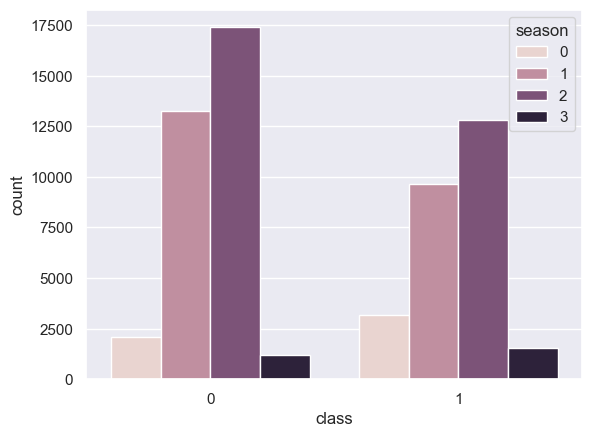

In [17]:
sns.countplot(data=train, x="class", hue='season');

In [18]:
v = train[(train["season"] == 0 ) & (train["class"] == 0)]
l = train[(train["season"] == 1 ) & (train["class"] == 0)]
o = train[(train["season"] == 2 ) & (train["class"] == 0)]
z = train[(train["season"] == 3 ) & (train["class"] == 0)]
print('Съедобные грибы')
print(f'Весна = {len(v.season)}')
print(f'Лето = {len(l.season)}')
print(f'Осень = {len(o.season)}')
print(f'Зима = {len(z.season)}')

Съедобные грибы
Весна = 2071
Лето = 13251
Осень = 17392
Зима = 1174


In [19]:
train['class'].value_counts()

class
0    33888
1    27181
Name: count, dtype: int64

Съедобных грибов 33888, ядовитых 27181 

#Визуализация параметра Класс#

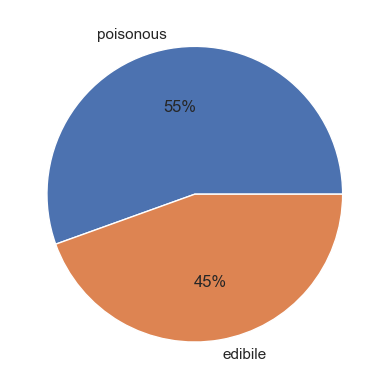

In [20]:
data = [33888, 	27181]
labels = ['poisonous', 'edibile']

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

(array([33888.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 27181.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

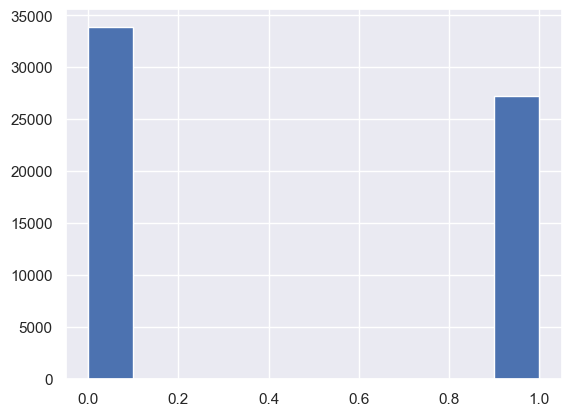

In [21]:
plt.hist(train['class'])

#Визуализация параметра Цвет шапки#

C:\Users\User\AppData\Local\Temp\ipykernel_7404\1551696414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train["cap-color"], palette='viridis')


<Axes: xlabel='cap-color', ylabel='count'>

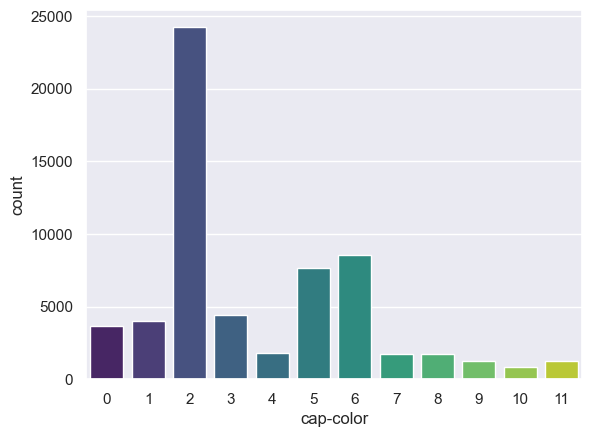

In [23]:

sns.countplot(x=train["cap-color"], palette='viridis')


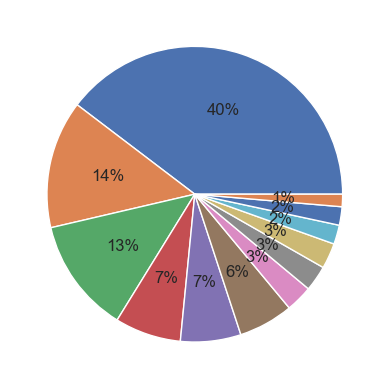

In [29]:


plt.pie(train['cap-color'].value_counts().tolist(), autopct='%.0f%%')
plt.show()

40% грибы с коричневой шляпкой

<Axes: xlabel='class', ylabel='count'>

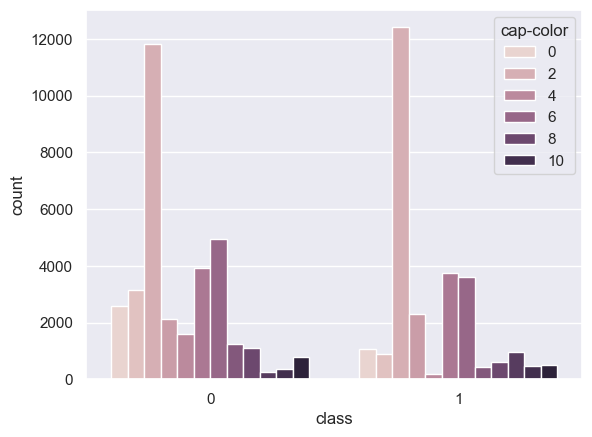

In [26]:
sns.countplot(data=train, x="class", hue='cap-color')

Съедобных грабов коричневых меньше чем ядовитых, зато черных больше

#Визуализация параметра диаметр колпачка#

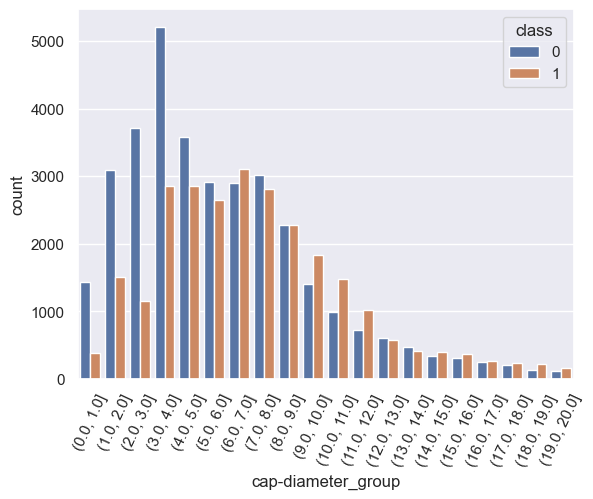

In [24]:
train["cap-diameter_group"] = pd.cut(x=train['cap-diameter'], bins=[0.00, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00, 9.00, 10.00, 11.00, 12.00, 13.00, 14.00, 15.00, 16.00, 17.00, 18.00, 19.00, 20.00])
plt.xticks(rotation=65)
sns.countplot(data=train, hue='class', x='cap-diameter_group');

Наибольшее число съедобных грибов находятся в диапазоне 3-4 см, очень мало 19-20 см.
Наибольшее число ядовитых грибов 6-7 см, мало 19-20 см.
Также можно сделать вывод о том, что вероятность найти съедобный гриб в доиапазоне 2-3 см наболее высока, по сравнению с дургими размерами 

#Визуализация параметра среда обитания#

<Axes: xlabel='class', ylabel='count'>

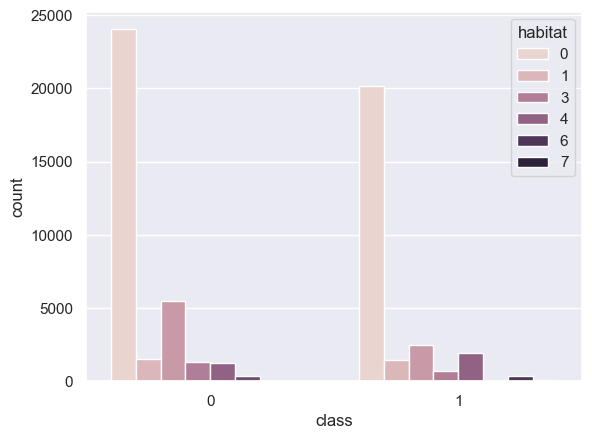

In [31]:
sns.countplot(data=train, x="class", hue='habitat') # леса=d, луга = m, травы = g, ересковые пустоши = h, листья = l, тропинки = p, отходы=w, городской=u

Можно сделать вывод, что съедобные грибы чаще всего находятся в лесах, а также в траве. Причем вероятность встретить ядовитые грибы также примерно равны как и съедобные 

#Тепловая карта#

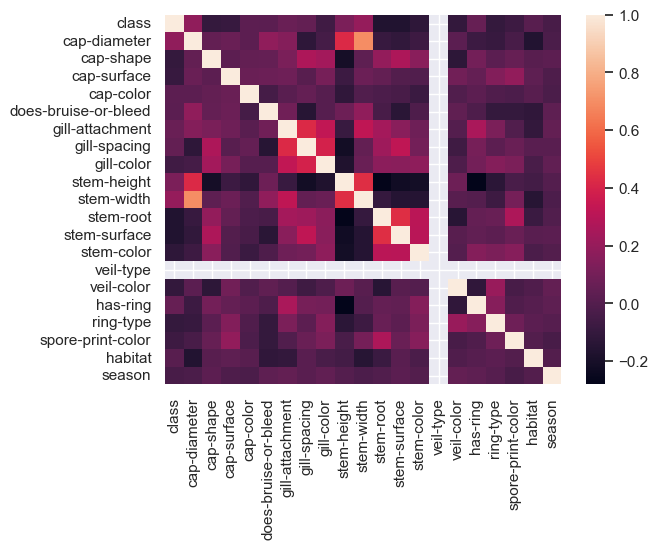

In [32]:
sns.heatmap(train.corr(numeric_only = True));

Изменений почти нет , сравнивая veil-type с остальными признаками
Можно увидеть, что сильные изменения находятся по stem-root и class